## This script contains the following points:

1. Import libraries and data set from CareerFoundry 4.10 Part 1.1.

2. Question 5: Create customer age group variable (where <35 years old = young, 35-64 years old = middle-age, and >=65 years old = older) and pie chart of customer age groups.

3. Question 5: Create subsample of middle-aged customers and visualizations of most popular products for middle-aged customers and customers overall.

4. Question 5: Create income level flag (above average and below average) and bar chart for number of orders throughout the day by income level.

5. Question 6: Create family profile variable (no kids and with kids) and pie chart to show the distribution of customer profiles.

6. Question 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

7. Question 8: Compare and identify a link between customer profiles with regions and departments.

8. Export final data set.

## 1. Import libraries and data set from CareerFoundry 4.10 Part 1.1.

In [1]:
# Import libraries.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turn project folder path into a string.

path = r'C:\Users\danie\Desktop\CareerFoundry\Achievement 4-Python\11-2023 Instacart Basket Analysis'
path

'C:\\Users\\danie\\Desktop\\CareerFoundry\\Achievement 4-Python\\11-2023 Instacart Basket Analysis'

In [3]:
# Import data set from CareerFoundry 4.10 Part 1.1 (low-activity customers excluded per Question 4).

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_cleaned.pkl'))

In [4]:
# Check output of data frame.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 34 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        object  
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  price_range_loc                object  
 14  busiest_day                    object  
 15  busiest_days                   object  
 16  busiest_period_of_day          object  
 17  max_order                     

## Question 5: Create customer age group variable (where <35 years old = young, 35-64 years old = middle-age, and >=65 years old = older) and pie chart of customer age groups.

In [5]:
# Create customer age group flag where <35 years old = young, 35-64 years old = middle-age, and >=65 years old = older.

df.loc[df['age'] <=35, 'age_range'] = 'Young'

C:\Users\danie\AppData\Local\Temp\ipykernel_13168\657951371.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Young' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['age'] <=35, 'age_range'] = 'Young'


In [6]:
df.loc[(df['age'] >=35) & (df['age'] <=64), 'age_range'] = 'Middle-aged'

In [7]:
df.loc[df['age'] >= 65, 'age_range'] = "Older"

In [8]:
# Check the output of the age_range column.

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,n_dependants,fam_status,income,_merge,department,region,exclusion_flag,age_range
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity,Young
1,2398795,1,2,3,7,15.000000,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity,Young
2,473747,1,3,3,12,21.000000,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity,Young
3,2254736,1,4,4,7,29.000000,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity,Young
4,431534,1,5,4,15,28.000000,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,beverages,South,Regular activity,Young


In [9]:
df.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,n_dependants,fam_status,income,_merge,department,region,exclusion_flag,age_range
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity,Young
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity,Young
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity,Young
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity,Young
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,both,beverages,West,Regular activity,Young


In [10]:
# Check value counts of age_range column.

df['age_range'].value_counts(dropna = False)

age_range
Middle-aged    14526725
Young           8242295
Older           8195544
Name: count, dtype: int64

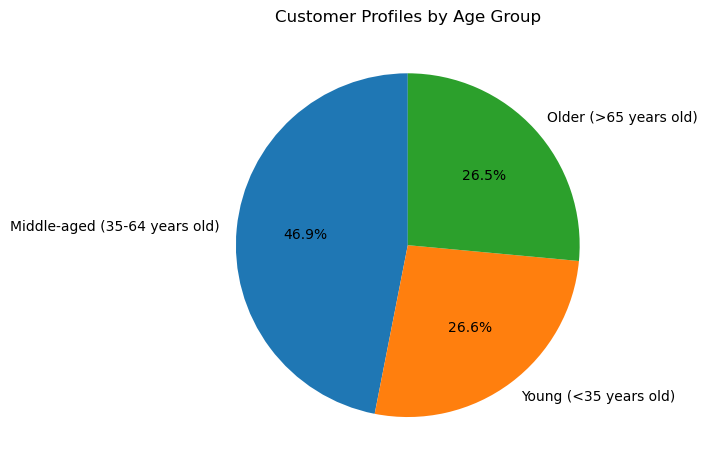

In [11]:
# Create pie chart of customer age groups.

y = np.array([14526725, 8242295, 8195544])
mylabels = ['Middle-aged (35-64 years old)', 'Young (<35 years old)', 'Older (>65 years old)']

plt.pie(y, labels = mylabels, autopct='%.1f%%', startangle = 90)
plt.title('Customer Profiles by Age Group')
plt.tight_layout()

# Save pie chart as an image.

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer_age_groups_pie.png'),  bbox_inches='tight')

# Show pie chart.

plt.show()

## 3. Question 5: Create subsample of middle-aged customers and visualizations of most popular products for middle-aged customers and customers overall.

In [12]:
# Create data frame containing only middle-aged customers.

df_middle_aged = df[df['age_range'] == 'Middle-aged']

In [13]:
# Check age_range value counts in df_middle_aged.

df_middle_aged['age_range'].value_counts(dropna = False)

age_range
Middle-aged    14526725
Name: count, dtype: int64

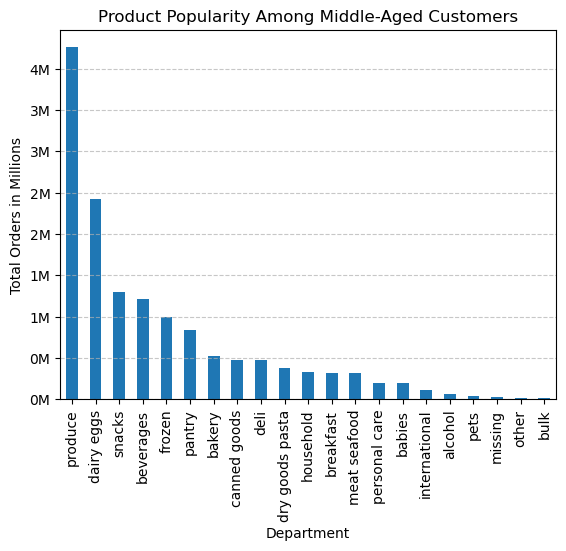

In [14]:
# Create bar chart illustrating most popular departments among middle-aged customers.

ax = df_middle_aged['department'].value_counts(dropna = False).plot.bar(legend=None)

plt.title('Product Popularity Among Middle-Aged Customers')
plt.ylabel('Total Orders in Millions')
plt.xlabel('Department')

#Change y-axis to display values in millions.

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

#Add grid.

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save bar chart as an image.

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Middle_aged_product_popularity_bar.png'),  bbox_inches='tight')

#Show bar chart.

plt.show()

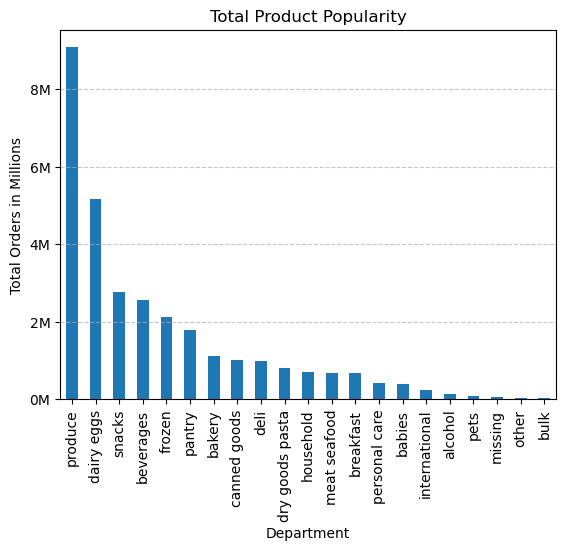

In [15]:
# Create bar chart of product popularity overall.

ax = df['department'].value_counts(dropna = False).plot.bar(legend=None)

plt.title("Total Product Popularity")
plt.ylabel("Total Orders in Millions")
plt.xlabel('Department')

#Change y-axis to display values in millions.

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

#Add grid.

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save bar chart as an image.

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Total_product_popularity_bar.png'),  bbox_inches='tight')

#Show bar chart.

plt.show()

## 4. Question 5: Create income level flag (above average and below average) and bar chart for number of orders throughout the day by income level.

In [16]:
# Calculate mean income.

df['income'].mean()

99675.86510754681

In [17]:
# Create a flag based on above and below average incomes.

df.loc[df ['income'] <= 99676, 'income_flag'] = 'Below average'

C:\Users\danie\AppData\Local\Temp\ipykernel_13168\4122003534.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Below average' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df ['income'] <= 99676, 'income_flag'] = 'Below average'


In [18]:
df.loc[df ['income'] > 99676, 'income_flag'] = 'Above average'

In [19]:
# Check output of income_flag.

df['income_flag'].value_counts(dropna = False)

income_flag
Below average    16624881
Above average    14339683
Name: count, dtype: int64

In [20]:
# Check that total income_flag value counts equal 30964564 entries.

16624881 + 14339683

30964564

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

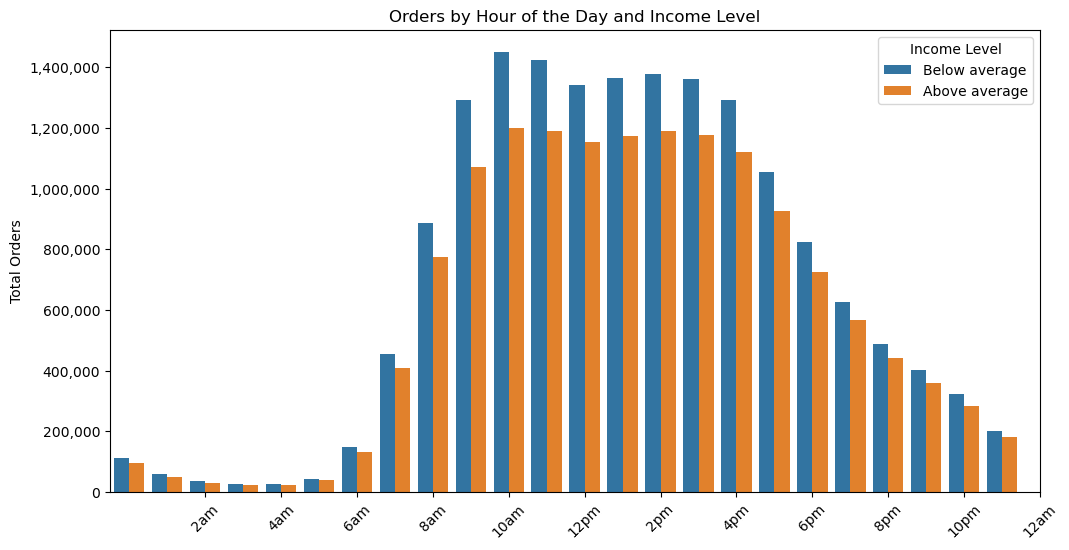

In [37]:
# Create bar chart of number of orders for each hour of the day divided by income level.

plt.figure(figsize=(12, 6))
sns.countplot(x='order_hour_of_day', hue='income_flag', data=df)

# Add labels and title.

plt.xlabel('')
plt.ylabel('Total Orders')
plt.title('Orders by Hour of the Day and Income Level')

# Add legend.

plt.legend(title='Income Level', loc='upper right')

# Customize the x-axis ticks and labels.

custom_xticks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
custom_xlabels = ['2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm', '12am']

# Rotate x-axis labels for readability.

plt.xticks(custom_xticks, custom_xlabels, rotation=45)

# Format y-axis tick labels to display full numbers.

def format_func(value, tick_number):
    return f'{int(value):,}'

# Apply formatter to y-axis.

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Save the bar chart as an image.

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hours_of_day_income.png'), bbox_inches='tight', pad_inches=0.1)

# Show bar chart.

plt.show()

## 5. Question 6: Create family profile variable (no kids and with kids) and pie chart to show the distribution of customer profiles.

In [22]:
# Create profiling variable of customers with "no kids" (n_dependants == 0) or "with kids" (everyone else).

result = []

for value in df["n_dependants"]:
  if value == 0:
    result.append("No kids")
  else:
    result.append("With kids")

In [23]:
# Check output.

result

['With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'With kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No kids',
 'No k

In [24]:
# Add no kids/with kids variable to data frame.

df['family_profile'] = result

In [25]:
# Check output.

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,n_dependants,fam_status,income,_merge,department,region,exclusion_flag,age_range,income_flag,family_profile
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,3,married,40423,both,beverages,South,Regular activity,Young,Below average,With kids
1,2398795,1,2,3,7,15.000000,196,1,1,Soda,...,3,married,40423,both,beverages,South,Regular activity,Young,Below average,With kids
2,473747,1,3,3,12,21.000000,196,1,1,Soda,...,3,married,40423,both,beverages,South,Regular activity,Young,Below average,With kids
3,2254736,1,4,4,7,29.000000,196,1,1,Soda,...,3,married,40423,both,beverages,South,Regular activity,Young,Below average,With kids
4,431534,1,5,4,15,28.000000,196,1,1,Soda,...,3,married,40423,both,beverages,South,Regular activity,Young,Below average,With kids


In [26]:
# Check value counts of fam_profile.

df['family_profile'].value_counts(dropna = False)

family_profile
With kids    23224883
No kids       7739681
Name: count, dtype: int64

In [27]:
# Create customer_profile variable of age_range + fam_status + family_profile.

df['customer_profile'] = df['age_range'] + '_' + df['fam_status'] + '_' + df['family_profile']

In [28]:
# Check output of customer_profile.

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,_merge,department,region,exclusion_flag,age_range,income_flag,family_profile,customer_profile
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,married,40423,both,beverages,South,Regular activity,Young,Below average,With kids,Young_married_With kids
1,2398795,1,2,3,7,15.000000,196,1,1,Soda,...,married,40423,both,beverages,South,Regular activity,Young,Below average,With kids,Young_married_With kids
2,473747,1,3,3,12,21.000000,196,1,1,Soda,...,married,40423,both,beverages,South,Regular activity,Young,Below average,With kids,Young_married_With kids
3,2254736,1,4,4,7,29.000000,196,1,1,Soda,...,married,40423,both,beverages,South,Regular activity,Young,Below average,With kids,Young_married_With kids
4,431534,1,5,4,15,28.000000,196,1,1,Soda,...,married,40423,both,beverages,South,Regular activity,Young,Below average,With kids,Young_married_With kids


In [29]:
df.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,_merge,department,region,exclusion_flag,age_range,income_flag,family_profile,customer_profile
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,single,53755,both,beverages,West,Regular activity,Young,Below average,No kids,Young_single_No kids
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,single,53755,both,beverages,West,Regular activity,Young,Below average,No kids,Young_single_No kids
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,single,53755,both,beverages,West,Regular activity,Young,Below average,No kids,Young_single_No kids
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,single,53755,both,beverages,West,Regular activity,Young,Below average,No kids,Young_single_No kids
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,single,53755,both,beverages,West,Regular activity,Young,Below average,No kids,Young_single_No kids


In [30]:
# Check value counts of customer_profile.

df['customer_profile'].value_counts(dropna = False)

customer_profile
Middle-aged_married_With kids                       10872560
Older_married_With kids                              6173586
Young_married_With kids                              4697565
Middle-aged_single_No kids                           3030852
Young_single_No kids                                 2063558
Older_divorced/widowed_No kids                       2021958
Young_living with parents and siblings_With kids     1481172
Middle-aged_divorced/widowed_No kids                  623313
Name: count, dtype: int64

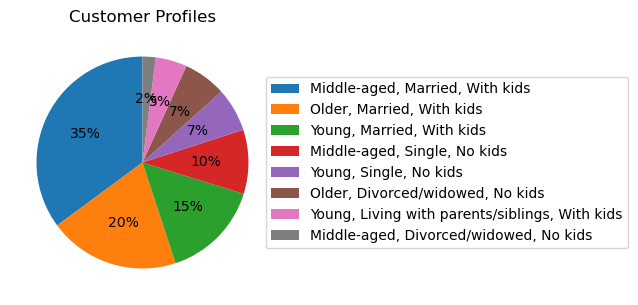

In [31]:
# Create pie chart of customer profiles.

y = np.array([10872560, 6173586, 4697565, 3030852, 2063558, 2021958, 1481172, 623313])
labels = ["Middle-aged, Married, With kids", "Older, Married, With kids", "Young, Married, With kids", "Middle-aged, Single, No kids", "Young, Single, No kids", "Older, Divorced/widowed, No kids", "Young, Living with parents/siblings, With kids", "Middle-aged, Divorced/widowed, No kids"]

plt.pie(y, autopct='%1.0f%%', startangle = 90)
plt.title('Customer Profiles')
plt.legend(labels=labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.tight_layout()

# Save pie chart as an image.

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer_profiles_pie.png'))

# Show pie chart.

plt.show()

## 6. Question 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure and create appropriate visualizations.

In [39]:
# Group data by customer_profile to calculate mean, minimum, and maximum days_since_prior_order to assess usage frequency.

df_customer_profile_usage = df.groupby('customer_profile').agg({'days_since_prior_order':['mean','min', 'max']})

In [40]:
# Check the output of groupby function.

df_customer_profile_usage.head()

days_since_prior_order           
                                                       mean  min   max
customer_profile                                                      
Middle-aged_divorced/widowed_No kids              10.713661  0.0  30.0
Middle-aged_married_With kids                     10.850563  0.0  30.0
Middle-aged_single_No kids                        10.776704  0.0  30.0
Older_divorced/widowed_No kids                    10.787079  0.0  30.0
Older_married_With kids                           10.816406  0.0  30.0

In [41]:
df_customer_profile_usage.tail()

days_since_prior_order       \
                                                                   mean  min   
customer_profile                                                               
Older_divorced/widowed_No kids                                10.787079  0.0   
Older_married_With kids                                       10.816406  0.0   
Young_living with parents and siblings_With kids              10.770283  0.0   
Young_married_With kids                                       10.831126  0.0   
Young_single_No kids                                          10.907668  0.0   

                                                        
                                                   max  
customer_profile                                        
Older_divorced/widowed_No kids                    30.0  
Older_married_With kids                           30.0  
Young_living with parents and siblings_With kids  30.0  
Young_married_With kids                           30.0  
Young_single_No kids                              30.0

In [43]:
# Calculate average days since prior order for visualization.

df_customer_profile_average = df.groupby(['customer_profile'])['days_since_prior_order'].mean()

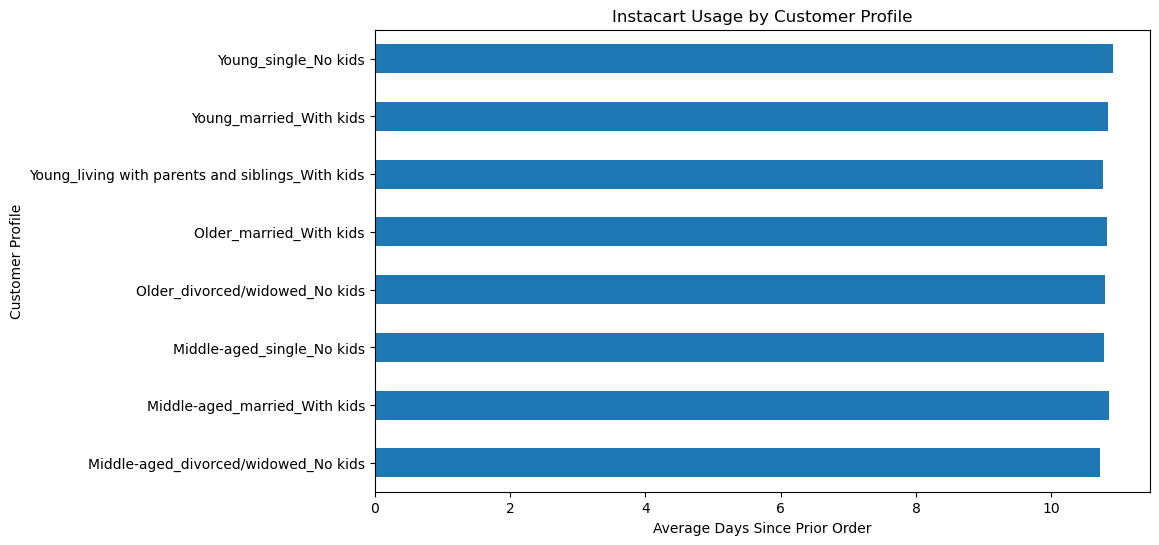

In [46]:
# Create horizontal bar chart of Instacart usage by customer profile.

df_customer_profile_average.plot(kind='barh', title='Instacart Usage by Customer Profile',
               ylabel='Customer Profile', xlabel='Average Days Since Prior Order', figsize=(10, 6))

# Save horizontal bar chart as an image.

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'usage_customer_profile_barh.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()

In [47]:
# Group data by customer_profile to calculate mean, minimum, and maximum expenditure.

df_customer_profile_prices = df.groupby('customer_profile').agg({'prices':['mean','min', 'max']})

In [48]:
# Check the output of groupby function.

df_customer_profile_prices.head()

prices              
                                           mean  min      max
customer_profile                                             
Middle-aged_divorced/widowed_No kids   9.989114  1.0  99999.0
Middle-aged_married_With kids         11.857158  1.0  99999.0
Middle-aged_single_No kids            12.537464  1.0  99999.0
Older_divorced/widowed_No kids        12.008598  1.0  99999.0
Older_married_With kids               11.675617  1.0  99999.0

In [49]:
df_customer_profile_prices.tail()

prices              
                                                       mean  min      max
customer_profile                                                         
Older_divorced/widowed_No kids                    12.008598  1.0  99999.0
Older_married_With kids                           11.675617  1.0  99999.0
Young_living with parents and siblings_With kids  10.890167  1.0  99999.0
Young_married_With kids                           12.499513  1.0  99999.0
Young_single_No kids                              12.194608  1.0  99999.0

In [50]:
# Calculate average days since prior order for visualization.

df_customer_profile_avgprice = df.groupby(['customer_profile'])['prices'].mean()

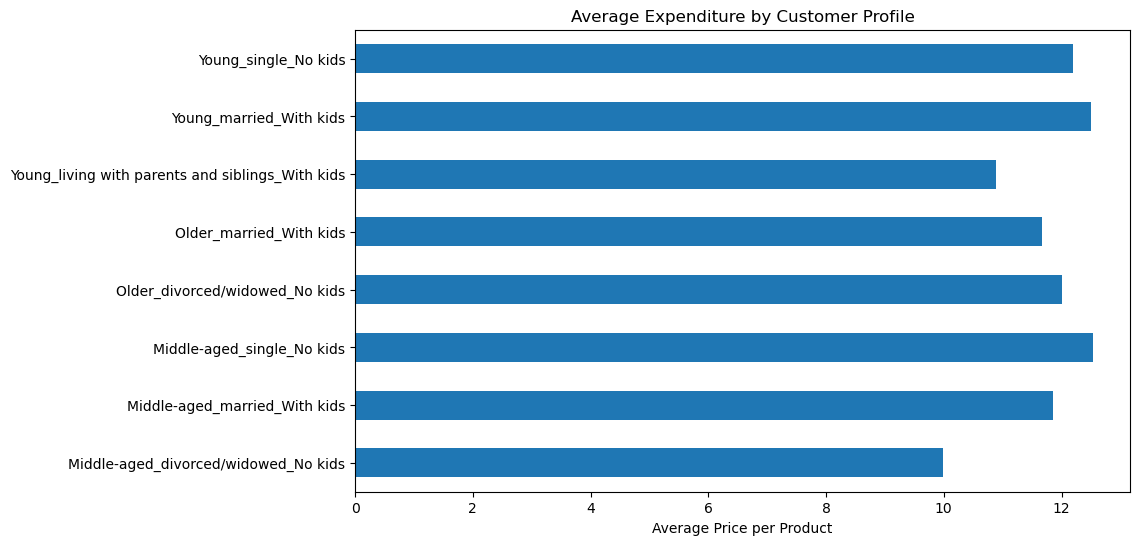

In [58]:
# Create horizontal bar chart of Instacart usage by customer profile.

df_customer_profile_avgprice.plot(kind='barh', title='Average Expenditure by Customer Profile',
               ylabel='', xlabel='Average Price per Product', figsize=(10, 6))

# Save horizontal bar chart as an image.

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avgprice_customer_profile_barh.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()

## 7. Question 8: Compare and identify a link between customer profiles with regions and departments.

In [70]:
# Group data by customer profile and region.

region_customer_profile = df.groupby(['customer_profile', 'region']).size().unstack()

In [71]:
# Calculate the total number of customer profiles for each region.

region_totals = region_customer_profile.sum(axis=1)

In [73]:
# Sort data by total orders in descending order.

region_totals_sorted = region_customer_profile.loc[region_totals.sort_values(ascending=False).index]

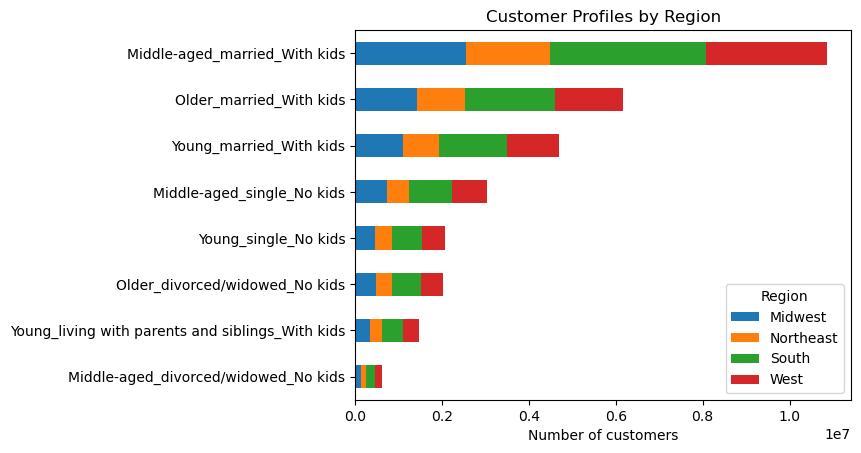

In [74]:
# Created stacked horizontal bar chart.

ax = region_totals_sorted.plot.barh(stacked=True)

# Add labels and title.

plt.xlabel('Number of customers')
plt.ylabel('')
plt.title('Customer Profiles by Region')

# Reverse the order of the y-axis.

plt.gca().invert_yaxis()

# Add legend.

plt.legend(title='Region')

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_region_stacked.png'), bbox_inches='tight', pad_inches=0.1)

plt.show()

In [64]:
# Group data by department and region.

dept_region_counts = df.groupby(['department', 'region']).size().unstack()

In [65]:
# Normalize the data along the vertical axis (columns/region).

dept_region_norm = dept_region_counts.div(dept_region_counts.sum(axis=0), axis=1)

In [66]:
# Sort data by total orders in descending order.

total_orders = dept_region_counts.sum(axis=1)
sorted_data = dept_region_norm.loc[total_orders.sort_values(ascending=False).index]

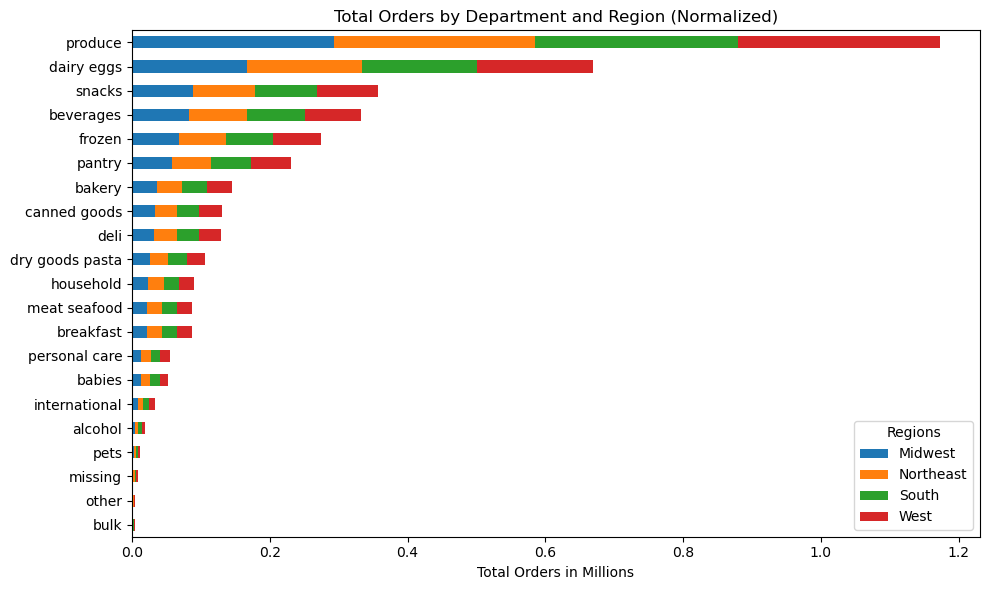

In [68]:
# Create stacked horizontal bar chart with normalized regions.

ax = sorted_data.plot.barh(stacked=True, figsize=(10, 6))

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add labels and a title
plt.xlabel('Total Orders in Millions')
plt.ylabel('')
plt.title('Total Orders by Department and Region (Normalized)')

# Add a legend with a title.

plt.legend(title='Regions', loc='lower right')

# Adjust the layout to ensure everything fits.

plt.tight_layout()

# Save the bar chart as an image.

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_dept_region_barh.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()


## 8. Export final data set.

In [75]:
# Export data frame to pickle file.

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_final.pkl'))